<a href="https://colab.research.google.com/github/MitaliDogra/Multimodal-Sensor-Fusion-for-Mental-Workload-Prediction/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup and Installation**

**Import Libraries**

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, tensorflow as tf
!pip install tensorflow keras-tuner seaborn xgboost scikit-learn kaggle
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, SimpleRNN, LSTM, GRU, Input, MultiHeadAttention, LayerNormalization, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from scipy.stats import pearsonr
import warnings

warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 13.5 MB/s eta 0:00:00


**Connect Kaggle & Download Dataset**

In [ ]:
from google.colab import files
files.upload()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d vallikadhawan/multimodal-bba
#!unzip multimodal-bba.zip -d /content/multimodal-bba

Saving FINAL_multimodal_dataset (1).csv to FINAL_multimodal_dataset (1).csv


{'FINAL_multimodal_dataset (1).csv': b'mental,physical,temporal,performance,effort,frustration,user_id,device,task,session,total_workload,a7992c39-6db1-4923-8660-647b8d12eb64/ch1,a7992c39-6db1-4923-8660-647b8d12eb64/ch2,a7992c39-6db1-4923-8660-647b8d12eb64/ch3,a7992c39-6db1-4923-8660-647b8d12eb64/ch4,a7992c39-6db1-4923-8660-647b8d12eb64/ch5,a7992c39-6db1-4923-8660-647b8d12eb64/ch6,a7992c39-6db1-4923-8660-647b8d12eb64/ch7,a7992c39-6db1-4923-8660-647b8d12eb64/ch8,iot_packet_count\n75.0,10.0,85.0,75.0,75.0,70.0,6,164,tab,Pursuit,390.0,6754.9430238978775,-123350.643957251,-49189.5878996586,-75993.09840641235,0.0,0.0,0.0,0.0,905731\n65.0,10.0,30.0,85.0,50.0,35.0,6,164,tab,Pursuit,275.0,6754.9430238978775,-123350.643957251,-49189.5878996586,-75993.09840641235,0.0,0.0,0.0,0.0,905731\n75.0,10.0,90.0,55.0,80.0,75.0,6,164,tab,Pursuit,385.0,6754.9430238978775,-123350.643957251,-49189.5878996586,-75993.09840641235,0.0,0.0,0.0,0.0,905731\n80.0,10.0,90.0,25.0,80.0,85.0,6,164,tab,Number Comparison,37

**Load and Inspect Dataset**

In [ ]:
DATA_PATH = "/content/FINAL_multimodal_dataset (1).csv"

try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ Dataset not found.")
    df = pd.DataFrame()

if not df.empty:
    print("Shape:", df.shape)
    display(df.head())
    print("\n--- Dataset Info ---")
    print(df.info())
    print("\n--- Summary Statistics ---")
    display(df.describe().T)

✅ Data loaded successfully.
Shape: (210, 20)


,mental,physical,temporal,performance,effort,frustration,user_id,device,task,session,total_workload,a7992c39-6db1-4923-8660-647b8d12eb64/ch1,a7992c39-6db1-4923-8660-647b8d12eb64/ch2,a7992c39-6db1-4923-8660-647b8d12eb64/ch3,a7992c39-6db1-4923-8660-647b8d12eb64/ch4,a7992c39-6db1-4923-8660-647b8d12eb64/ch5,a7992c39-6db1-4923-8660-647b8d12eb64/ch6,a7992c39-6db1-4923-8660-647b8d12eb64/ch7,a7992c39-6db1-4923-8660-647b8d12eb64/ch8,iot_packet_count
0,75.0,10.0,85.0,75.0,75.0,70.0,6,164,tab,Pursuit,390.0,6754.943024,-123350.643957,-49189.58790,-75993.098406,0.0,0.0,0.0,0.0,905731
1,65.0,10.0,30.0,85.0,50.0,35.0,6,164,tab,Pursuit,275.0,6754.943024,-123350.643957,-49189.58790,-75993.098406,0.0,0.0,0.0,0.0,905731
2,75.0,10.0,90.0,55.0,80.0,75.0,6,164,tab,Pursuit,385.0,6754.943024,-123350.643957,-49189.58790,-75993.098406,0.0,0.0,0.0,0.0,905731
3,80.0,10.0,90.0,25.0,80.0,85.0,6,164,tab,Number Comparison,370.0,7092.770534,-154151.977049,-48926.06428,-75121.941016,0.0,0.0,0.0,0.0,588399
4,70.0,10.0,80.0,55.0,70.0,75.0,6,164,tab,Number Comparison,360.0,7092.770534,-154151.977049,-48926.06428,-75121.941016,0.0,0.0,0.0,0.0,588399



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   mental                                    210 non-null    float64
 1   physical                                  210 non-null    float64
 2   temporal                                  210 non-null    float64
 3   performance                               210 non-null    float64
 4   effort                                    210 non-null    float64
 5   frustration                               210 non-null    float64
 6   user_id                                   210 non-null    int64  
 7   device                                    210 non-null    int64  
 8   task                                      210 non-null    object 
 9   session                                   210 non-null    object 
 10  total_workload  

,count,mean,std,min,25%,50%,75%,max
mental,210.0,40.595238,25.798316,5.000000,16.250000,35.000000,6.500000e+01,9.500000e+01
physical,210.0,22.642857,18.817712,5.000000,10.000000,15.000000,3.000000e+01,8.000000e+01
temporal,210.0,45.666667,27.944465,5.000000,20.000000,40.000000,7.375000e+01,1.000000e+02
performance,210.0,54.928571,26.031259,0.000000,30.000000,60.000000,7.500000e+01,1.000000e+02
effort,210.0,42.428571,24.486245,5.000000,20.000000,35.000000,6.500000e+01,9.500000e+01
frustration,210.0,30.666667,27.764101,5.000000,5.000000,20.000000,5.000000e+01,9.500000e+01
user_id,210.0,8.000000,1.417593,6.000000,7.000000,8.000000,9.000000e+00,1.000000e+01
device,210.0,167.900000,3.307885,163.000000,165.000000,167.500000,1.710000e+02,1.730000e+02
total_workload,210.0,236.928571,106.123381,65.000000,140.000000,222.500000,3.387500e+02,4.450000e+02
a7992c39-6db1-4923-8660-647b8d12eb64/ch1,210.0,-2883.253606,37952.646404,-139942.651855,4625.846042,9887.743307,1.919991e+04,2.562272e+04


**Exploratory Data Analysis (EDA)**

<Figure size 1400x1000 with 0 Axes>

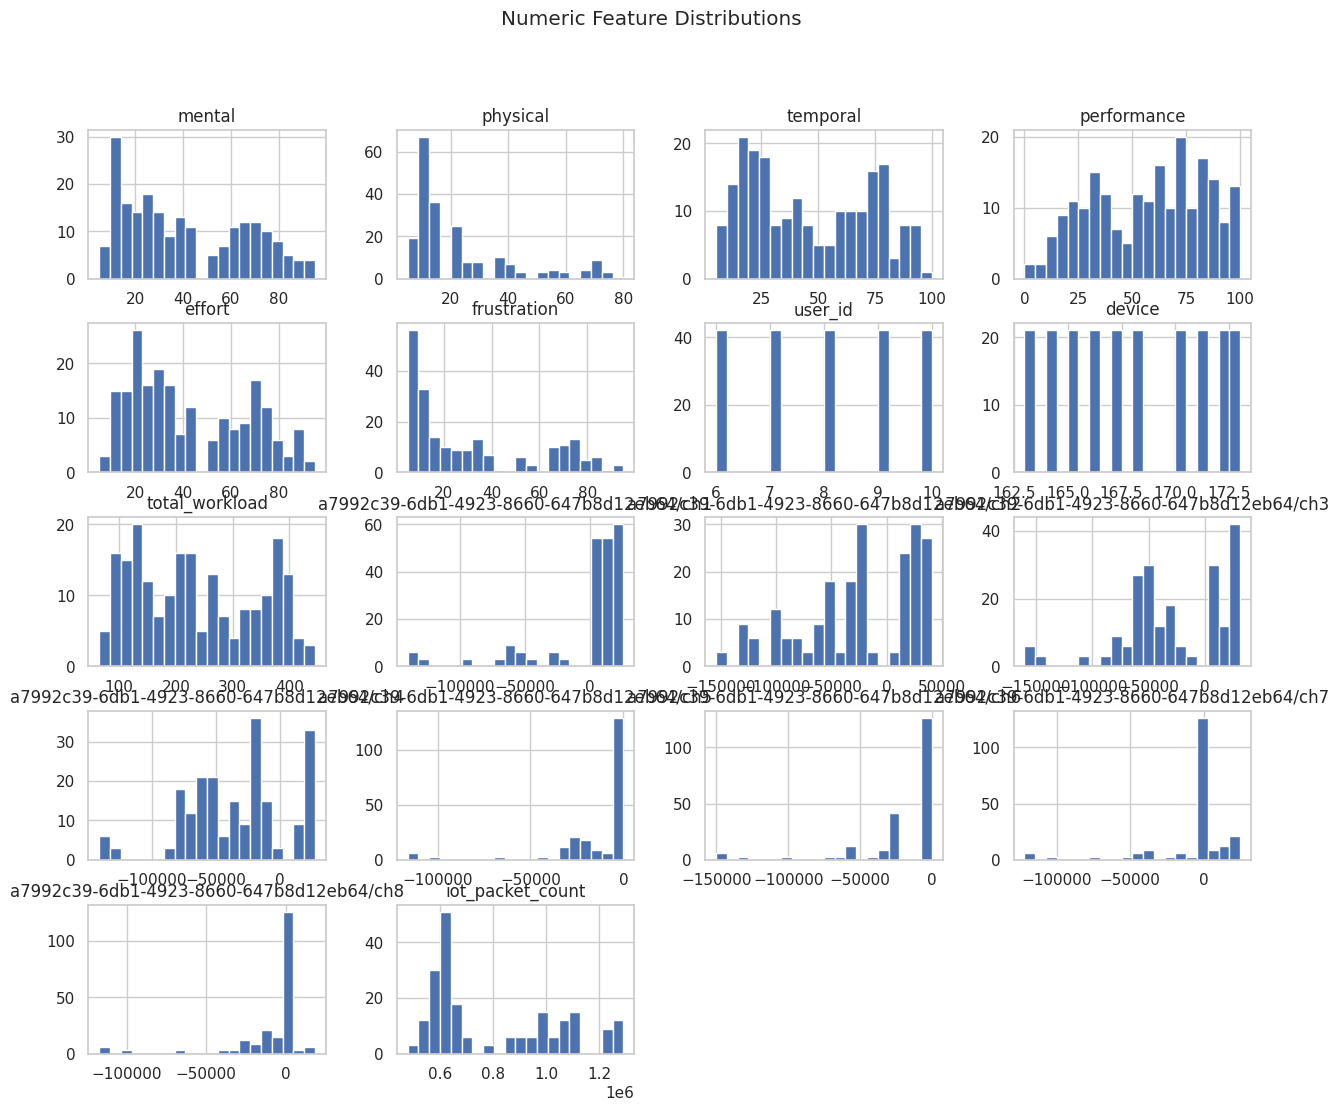

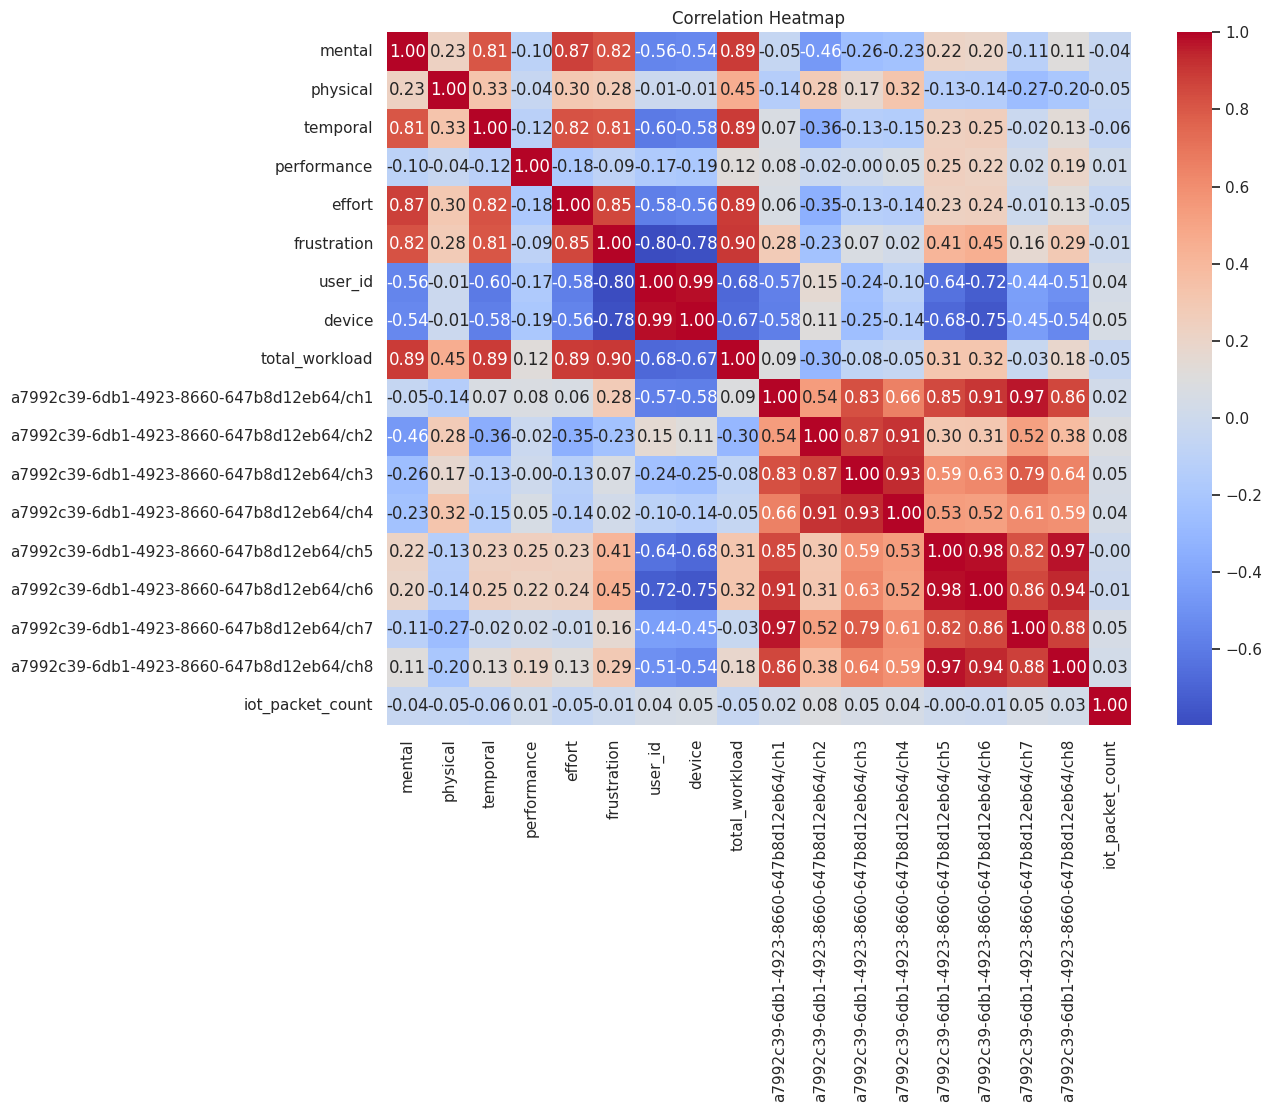

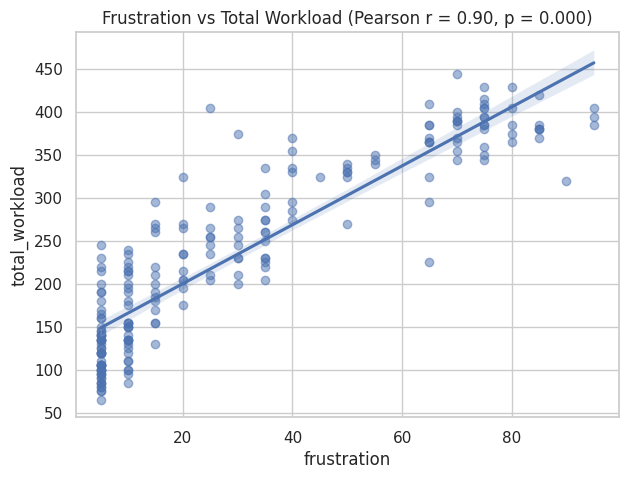

In [ ]:
if df.empty:
    print("No data for EDA. Load the dataset first.")
else:
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    plt.figure(figsize=(14,10))
    df[num_cols].hist(figsize=(15,12), bins=20)
    plt.suptitle("Numeric Feature Distributions")
    plt.show()

    plt.figure(figsize=(12,9))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    if 'frustration' in df.columns and 'total_workload' in df.columns:
        from scipy.stats import pearsonr
        r, p = pearsonr(df['frustration'].fillna(df['frustration'].mean()), df['total_workload'].fillna(df['total_workload'].mean()))
        plt.figure(figsize=(7,5))
        sns.regplot(data=df, x='frustration', y='total_workload', scatter_kws={'alpha':0.5})
        plt.title(f"Frustration vs Total Workload (Pearson r = {r:.2f}, p = {p:.3f})")
        plt.show()

**Target Creation (Binary Frustration) + Preprocessing**

In [ ]:
if df.empty:
    print("No data available. Please load the dataset in Section 3.")
else:
    # Create binary target for frustration (1 = high frustration, 0 = low)
    median_frust = df['frustration'].median()
    df['frustration_binary'] = (df['frustration'] > median_frust).astype(int)

    # Drop meta columns if present
    drop_cols = [c for c in ['user','session','device','task','condition'] if c in df.columns]
    target_reg, target_cls = 'frustration', 'frustration_binary'

    # Select numeric features only for model input (you can modify to include engineered features)
    X = df.drop(columns=[target_reg, target_cls] + drop_cols, errors='ignore').select_dtypes(include=[np.number])
    y_reg = df[target_reg].fillna(df[target_reg].mean()).values
    y_cls = df[target_cls].astype(int).values

    # Handle missing values and convert to numpy arrays
    X = X.fillna(0).values

    # Train-test split
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

    # Standard scaling
    scaler_reg = StandardScaler()
    scaler_cls = StandardScaler()
    X_train_reg = scaler_reg.fit_transform(X_train_reg)
    X_test_reg = scaler_reg.transform(X_test_reg)
    X_train_cls = scaler_cls.fit_transform(X_train_cls)
    X_test_cls = scaler_cls.transform(X_test_cls)

**Early stopping**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**Model Builders(ANN, CNN, RNN reshaping)**

In [ ]:
# Reshape for sequence models: use timesteps=1 (features as channels) unless you have temporal windows
if not df.empty:
    X_train_reg_rnn = X_train_reg.reshape((X_train_reg.shape[0], 1, X_train_reg.shape[1]))
    X_test_reg_rnn  = X_test_reg.reshape((X_test_reg.shape[0], 1, X_test_reg.shape[1]))

    X_train_cls_rnn = X_train_cls.reshape((X_train_cls.shape[0], 1, X_train_cls.shape[1]))
    X_test_cls_rnn  = X_test_cls.reshape((X_test_cls.shape[0], 1, X_test_cls.shape[1]))

    # For Conv1D usage (timesteps, channels)
    X_train_reg_cnn = X_train_reg.reshape((X_train_reg.shape[0], 1, X_train_reg.shape[1]))
    X_test_reg_cnn  = X_test_reg.reshape((X_test_reg.shape[0], 1, X_test_reg.shape[1]))

    X_train_cls_cnn = X_train_cls.reshape((X_train_cls.shape[0], 1, X_train_cls.shape[1]))
    X_test_cls_cnn  = X_test_cls.reshape((X_test_cls.shape[0], 1, X_test_cls.shape[1]))

**ANN**

In [ ]:
def build_ann_reg(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'), BatchNormalization(), Dropout(0.3),
        Dense(64, activation='relu'), Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_ann_clf(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'), BatchNormalization(), Dropout(0.3),
        Dense(64, activation='relu'), Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


**GRU MODELS**

In [ ]:
def build_gru_reg(input_shape):
    model = Sequential([
        GRU(64, return_sequences=False, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_gru_clf(input_shape):
    model = Sequential([
        GRU(64, return_sequences=False, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



**CNN Multikernel regression**

In [ ]:
def build_cnn_multikernel_reg(input_shape):
    inp = Input(shape=input_shape)
    b1 = Conv1D(64, 1, activation='relu', padding='same')(inp)
    b2 = Conv1D(64, 3, activation='relu', padding='same')(inp)
    b3 = Conv1D(64, 5, activation='relu', padding='same')(inp)
    merged = tf.keras.layers.concatenate([b1, b2, b3])
    flat = Flatten()(merged)
    dense = Dense(64, activation='relu')(flat)
    out = Dense(1)(dense)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_cnn_multikernel_clf(input_shape):
    inp = Input(shape=input_shape)
    b1 = Conv1D(64, 1, activation='relu', padding='same')(inp)
    b2 = Conv1D(64, 3, activation='relu', padding='same')(inp)
    b3 = Conv1D(64, 5, activation='relu', padding='same')(inp)
    merged = tf.keras.layers.concatenate([b1, b2, b3])
    flat = Flatten()(merged)
    dense = Dense(64, activation='relu')(flat)
    out = Dense(1, activation='sigmoid')(dense)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


**Residual CNN (ResNet)**

In [ ]:
def res_block(x, filters):
    shortcut = x
    x = Conv1D(filters, 3, padding='same', activation='relu')(x)
    x = Conv1D(filters, 3, padding='same')(x)
    x = tf.keras.layers.add([shortcut, x])
    x = tf.keras.layers.ReLU()(x)
    return x


def build_cnn_residual_reg(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, 3, padding='same', activation='relu')(inp)
    x = res_block(x, 64)
    x = res_block(x, 64)
    flat = Flatten()(x)
    dense = Dense(64, activation='relu')(flat)
    out = Dense(1)(dense)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_cnn_residual_clf(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, 3, padding='same', activation='relu')(inp)
    x = res_block(x, 64)
    x = res_block(x, 64)
    flat = Flatten()(x)
    dense = Dense(64, activation='relu')(flat)
    out = Dense(1, activation='sigmoid')(dense)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

**Training and Evaluation of models**

**ANN Regression**

In [ ]:
if not df.empty:
    ann_reg = build_ann_reg(X_train_reg.shape[1])
    print("🔹 Training ANN Regression...")
    ann_reg.fit(X_train_reg, y_train_reg, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    y_pred_reg = ann_reg.predict(X_test_reg).flatten()
    ann_reg_results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)),
        'MAE': mean_absolute_error(y_test_reg, y_pred_reg),
        'R2': r2_score(y_test_reg, y_pred_reg)
    }
    print(pd.DataFrame([ann_reg_results], index=['ANN Regression']))

🔹 Training ANN Regression...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - loss: 1914.5245 - mae: 33.2470 - val_loss: 1434.4218 - val_mae: 27.6229
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1819.0662 - mae: 32.3169 - val_loss: 1399.0164 - val_mae: 27.4079
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1570.3741 - mae: 30.2164 - val_loss: 1351.0751 - val_mae: 27.0648
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1317.4103 - mae: 27.9110 - val_loss: 1284.8389 - val_mae: 26.5405
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 978.6428 - mae: 23.7555 - val_loss: 1194.9167 - val_mae: 25.7746
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 909.9121 - mae: 23.1791 - val_loss: 1075.7437 - val_mae: 24.6812
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 901.0876 - mae: 23.8680 - val_loss: 933.5688 - val_mae: 23.2645
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 462.1553 - mae: 17.5849 - val_loss: 781.7529 - val_mae

**ANN Classification**

In [ ]:
if not df.empty:
    ann_cls = build_ann_clf(X_train_cls.shape[1])
    print("\n🔹 Training ANN Classification...")
    ann_cls.fit(X_train_cls, y_train_cls, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    y_pred_cls = (ann_cls.predict(X_test_cls) > 0.5).astype(int)
    ann_cls_results = {
        'Accuracy': accuracy_score(y_test_cls, y_pred_cls),
        'Precision': precision_score(y_test_cls, y_pred_cls),
        'Recall': recall_score(y_test_cls, y_pred_cls),
        'F1': f1_score(y_test_cls, y_pred_cls)
    }
    print(pd.DataFrame([ann_cls_results], index=['ANN Classification']))



🔹 Training ANN Classification...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.7355 - loss: 0.5551 - val_accuracy: 0.9706 - val_loss: 0.4521
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9175 - loss: 0.2702 - val_accuracy: 0.9706 - val_loss: 0.3580
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9885 - loss: 0.1184 - val_accuracy: 0.9412 - val_loss: 0.3131
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.0913 - val_accuracy: 0.9118 - val_loss: 0.2866
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9428 - loss: 0.1171 - val_accuracy: 0.9412 - val_loss: 0.2613
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9423 - loss: 0.1554 - val_accuracy: 0.9118 - val_loss: 0.2438
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9540 - loss: 0.1146 - val_accuracy: 0.9118 - val_loss: 0.2283
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9405 - loss: 0.1128 - v

**GRU Regression**

In [ ]:
if not df.empty:
    print("\n🔹 Training GRU Regression...")
    gru_reg = build_gru_reg((1, X_train_reg.shape[1]))
    gru_reg.fit(X_train_reg_rnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    y_pred_gru_reg = gru_reg.predict(X_test_reg_rnn).flatten()
    gru_reg_results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_gru_reg)),
        'MAE': mean_absolute_error(y_test_reg, y_pred_gru_reg),
        'R2': r2_score(y_test_reg, y_pred_gru_reg)
    }
    print(pd.DataFrame([gru_reg_results], index=['GRU Regression']))


🔹 Training GRU Regression...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - loss: 1790.5343 - mae: 32.3289 - val_loss: 1463.3579 - val_mae: 27.8977
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1915.7386 - mae: 32.0419 - val_loss: 1450.3204 - val_mae: 27.6884
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1809.3607 - mae: 31.6897 - val_loss: 1434.6740 - val_mae: 27.4489
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2200.2200 - mae: 35.6728 - val_loss: 1412.7587 - val_mae: 27.1433
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1738.6027 - mae: 30.8093 - val_loss: 1382.3619 - val_mae: 26.7467
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1829.0111 - mae: 32.0005 - val_loss: 1338.2194 - val_mae: 26.2048
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1667.9719 - mae: 29.8718 - val_loss: 1276.2521 - val_mae: 25.4647
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1509.2988 - mae: 28.2079 - val_loss: 1187.9551 - v

**GRU Classification**

In [ ]:
if not df.empty:
    print("\n🔹 Training GRU Classification...")
    gru_clf = build_gru_clf((1, X_train_cls.shape[1]))
    gru_clf.fit(X_train_cls_rnn, y_train_cls, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    y_pred_gru_cls = (gru_clf.predict(X_test_cls_rnn) > 0.5).astype(int)
    gru_cls_results = {
        'Accuracy': accuracy_score(y_test_cls, y_pred_gru_cls),
        'Precision': precision_score(y_test_cls, y_pred_gru_cls),
        'Recall': recall_score(y_test_cls, y_pred_gru_cls),
        'F1': f1_score(y_test_cls, y_pred_gru_cls)
    }
    print(pd.DataFrame([gru_cls_results], index=['GRU Classification']))


🔹 Training GRU Classification...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.5421 - loss: 0.6798 - val_accuracy: 0.8235 - val_loss: 0.6230
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8477 - loss: 0.6036 - val_accuracy: 0.9118 - val_loss: 0.5483
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9132 - loss: 0.5363 - val_accuracy: 0.9412 - val_loss: 0.4742
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9599 - loss: 0.4638 - val_accuracy: 0.9706 - val_loss: 0.3976
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9697 - loss: 0.3841 - val_accuracy: 0.9706 - val_loss: 0.3242
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9383 - loss: 0.3283 - val_accuracy: 0.9706 - val_loss: 0.2573
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9641 - loss: 0.2425 - val_accuracy: 0.9706 - val_loss: 0.2019
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9708 - loss: 0.1907 - val

**Multi Kernel CNN**

In [ ]:
if not df.empty:
    print("\n Running Multi-Kernel CNN Regression...")
    mk_cnn_reg_model = build_cnn_multikernel_reg((1, X_train_reg.shape[1]))
    mk_cnn_reg_model.fit(X_train_reg_cnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    mk_pred_reg = mk_cnn_reg_model.predict(X_test_reg_cnn).flatten()
    mk_cnn_reg_results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, mk_pred_reg)),
        'MAE': mean_absolute_error(y_test_reg, mk_pred_reg),
        'R2': r2_score(y_test_reg, mk_pred_reg)
    }
    print(pd.DataFrame([mk_cnn_reg_results], index=['MultiKernel CNN Regression']))


🚀 Running Multi-Kernel CNN Regression...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 1728.1901 - mae: 30.6143 - val_loss: 1369.3809 - val_mae: 26.4250
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1588.1379 - mae: 29.0026 - val_loss: 1264.1208 - val_mae: 24.8575
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1552.2490 - mae: 28.4162 - val_loss: 1112.7144 - val_mae: 22.8923
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1542.4542 - mae: 28.1108 - val_loss: 909.3286 - val_mae: 20.4843
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1266.6757 - mae: 25.8341 - val_loss: 655.9385 - val_mae: 17.4048
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 821.4974 - mae: 20.7674 - val_loss: 387.8564 - val_mae: 13.4358
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 455.1656 - mae: 15.5233 - val_loss: 163.1635 - val_mae: 8.9061
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 122.4503 - mae: 8.1819 - val_loss: 54.5171 -

In [ ]:
if not df.empty:
    print("\n🚀 Running Multi-Kernel CNN Classification...")
    mk_cnn_clf_model = build_cnn_multikernel_clf((1, X_train_cls.shape[1]))
    mk_cnn_clf_model.fit(X_train_cls_cnn, y_train_cls, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    mk_pred_cls = (mk_cnn_clf_model.predict(X_test_cls_cnn) > 0.5).astype(int)
    mk_cnn_clf_results = {
        'Accuracy': accuracy_score(y_test_cls, mk_pred_cls),
        'Precision': precision_score(y_test_cls, mk_pred_cls),
        'Recall': recall_score(y_test_cls, mk_pred_cls),
        'F1': f1_score(y_test_cls, mk_pred_cls)
    }
    print(pd.DataFrame([mk_cnn_clf_results], index=['MultiKernel CNN Classification']))


🚀 Running Multi-Kernel CNN Classification...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.6354 - loss: 0.6915 - val_accuracy: 0.9412 - val_loss: 0.3390
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9477 - loss: 0.2913 - val_accuracy: 0.9706 - val_loss: 0.1894
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9846 - loss: 0.1640 - val_accuracy: 0.9706 - val_loss: 0.1281
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9875 - loss: 0.1223 - val_accuracy: 0.9706 - val_loss: 0.0991
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9813 - loss: 0.0901 - val_accuracy: 0.9412 - val_loss: 0.0888
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9852 - loss: 0.0809 - val_accuracy: 0.9706 - val_loss: 0.0845
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9769 - loss: 0.0744 - val_accuracy: 0.9706 - val_loss: 0.0840
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9818 - loss:

**ResNet Regression**

In [ ]:
if not df.empty:
    print("\n🚀 Running Residual CNN Regression...")
    res_cnn_reg_model = build_cnn_residual_reg((1, X_train_reg.shape[1]))
    res_cnn_reg_model.fit(X_train_reg_cnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    res_pred_reg = res_cnn_reg_model.predict(X_test_reg_cnn).flatten()
    res_cnn_reg_results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, res_pred_reg)),
        'MAE': mean_absolute_error(y_test_reg, res_pred_reg),
        'R2': r2_score(y_test_reg, res_pred_reg)
    }
    print(pd.DataFrame([res_cnn_reg_results], index=['Residual CNN Regression']))



🚀 Running Residual CNN Regression...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - loss: 1588.2935 - mae: 29.6212 - val_loss: 1402.8035 - val_mae: 26.9877
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2067.6377 - mae: 34.7883 - val_loss: 1269.3408 - val_mae: 24.8710
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1688.8110 - mae: 30.2338 - val_loss: 897.4708 - val_mae: 20.2387
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 996.8069 - mae: 22.6327 - val_loss: 208.0702 - val_mae: 12.6179
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 221.8642 - mae: 12.3652 - val_loss: 109.1826 - val_mae: 8.8705
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 107.7274 - mae: 8.1787 - val_loss: 79.4603 - val_mae: 6.6768
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 108.2097 - mae: 7.6516 - val_loss: 48.7380 - val_mae: 5.2346
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 75.0273 - mae: 6.2911 - val_loss: 41.5727 - val_mae: 

**ResNet Classification**

In [ ]:
if not df.empty:
    print("\n🚀 Running Residual CNN Classification...")
    res_cnn_clf_model = build_cnn_residual_clf((1, X_train_cls.shape[1]))
    res_cnn_clf_model.fit(X_train_cls_cnn, y_train_cls, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
    res_pred_cls = (res_cnn_clf_model.predict(X_test_cls_cnn) > 0.5).astype(int)
    res_cnn_clf_results = {
        'Accuracy': accuracy_score(y_test_cls, res_pred_cls),
        'Precision': precision_score(y_test_cls, res_pred_cls),
        'Recall': recall_score(y_test_cls, res_pred_cls),
        'F1': f1_score(y_test_cls, res_pred_cls)
    }
    print(pd.DataFrame([res_cnn_clf_results], index=['Residual CNN Classification']))



🚀 Running Residual CNN Classification...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.5224 - loss: 0.7108 - val_accuracy: 0.8235 - val_loss: 0.5522
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8922 - loss: 0.5248 - val_accuracy: 0.9706 - val_loss: 0.3847
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9536 - loss: 0.3316 - val_accuracy: 0.9706 - val_loss: 0.2362
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.1964 - val_accuracy: 0.9412 - val_loss: 0.1235
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9766 - loss: 0.1116 - val_accuracy: 0.9706 - val_loss: 0.1029
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9516 - loss: 0.1225 - val_accuracy: 0.9412 - val_loss: 0.1100
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9753 - loss: 0.0747 - val_accuracy: 0.9412 - val_loss: 0.1163
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.

**Training Classical Machine Learning Models**

In [ ]:
def train_ml_models(X_train, y_train, X_test, y_test, task='regression'):
    results = {}
    if task == 'regression':
        models = {
            'SVR': SVR(),
            'RandomForest': RandomForestRegressor(random_state=42),
            'XGBoost': XGBRegressor(random_state=42)
        }
        for name, model in models.items():
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            results[name] = {
                'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
                'MAE': mean_absolute_error(y_test, preds),
                'R2': r2_score(y_test, preds)
            }
    else:
        models = {
            'SVM': SVC(probability=True, random_state=42),
            'RandomForest': RandomForestClassifier(random_state=42),
            'XGBoost': XGBClassifier(random_state=42)
        }
        for name, model in models.items():
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            results[name] = {
                'Accuracy': accuracy_score(y_test, preds),
                'Precision': precision_score(y_test, preds),
                'Recall': recall_score(y_test, preds),
                'F1': f1_score(y_test, preds)
            }
    return pd.DataFrame(results).T

print("⚙️ Training ML Regression Models...")
ml_reg_results = train_ml_models(X_train_reg, y_train_reg, X_test_reg, y_test_reg, task='regression')
display(ml_reg_results)

print("⚙️ Training ML Classification Models...")
ml_cls_results = train_ml_models(X_train_cls, y_train_cls, X_test_cls, y_test_cls, task='classification')
display(ml_cls_results)


⚙️ Training ML Regression Models...


,RMSE,MAE,R2
SVR,14.232545,9.753321,0.669732
RandomForest,7.437185,4.984524,0.909818
XGBoost,7.691028,4.692913,0.903557


⚙️ Training ML Classification Models...


,Accuracy,Precision,Recall,F1
SVM,0.952381,1.0,0.882353,0.937500
RandomForest,0.928571,1.0,0.823529,0.903226
XGBoost,0.952381,1.0,0.882353,0.937500


**Transfer Learning (Stacking)**

In [ ]:
print("🔁 Transfer Learning: Adding Frustration Predictions to Workload Features")

base_clf = RandomForestClassifier(random_state=42)
train_preds = cross_val_predict(base_clf, X_train_cls, y_train_cls, cv=5)
base_clf.fit(X_train_cls, y_train_cls)
test_preds = base_clf.predict(X_test_cls)

X_train_stacked = np.hstack([X_train_reg, train_preds.reshape(-1,1)])
X_test_stacked = np.hstack([X_test_reg, test_preds.reshape(-1,1)])

stacked_results = train_ml_models(X_train_stacked, y_train_reg, X_test_stacked, y_test_reg, task='regression')
display(stacked_results)


🔁 Transfer Learning: Adding Frustration Predictions to Workload Features


,RMSE,MAE,R2
SVR,14.204934,9.675109,0.671012
RandomForest,7.311879,4.590476,0.912832
XGBoost,8.188460,4.906898,0.890678


**Final Report and Visualization**

🏁 FINAL SUMMARY


,Reg_RMSE,Reg_MAE,Reg_R2,Cls_Accuracy,Cls_Precision,Cls_Recall,Cls_F1,Stacked_RMSE,Stacked_MAE,Stacked_R2,RMSE,MAE,R2,Accuracy,Precision,Recall,F1
SVR,14.232545,9.753321,0.669732,-,-,-,-,-,-,-,-,-,-,-,-,-,-
RandomForest,7.437185,4.984524,0.909818,-,-,-,-,-,-,-,-,-,-,-,-,-,-
XGBoost,7.691028,4.692913,0.903557,-,-,-,-,-,-,-,-,-,-,-,-,-,-
SVM,-,-,-,0.952381,1.0,0.882353,0.9375,-,-,-,-,-,-,-,-,-,-
RandomForest,-,-,-,0.928571,1.0,0.823529,0.903226,-,-,-,-,-,-,-,-,-,-
XGBoost,-,-,-,0.952381,1.0,0.882353,0.9375,-,-,-,-,-,-,-,-,-,-
SVR,-,-,-,-,-,-,-,14.204934,9.675109,0.671012,-,-,-,-,-,-,-
RandomForest,-,-,-,-,-,-,-,7.311879,4.590476,0.912832,-,-,-,-,-,-,-
XGBoost,-,-,-,-,-,-,-,8.18846,4.906898,0.890678,-,-,-,-,-,-,-
ANN Regression,-,-,-,-,-,-,-,-,-,-,5.676929,4.456126,0.947455,-,-,-,-


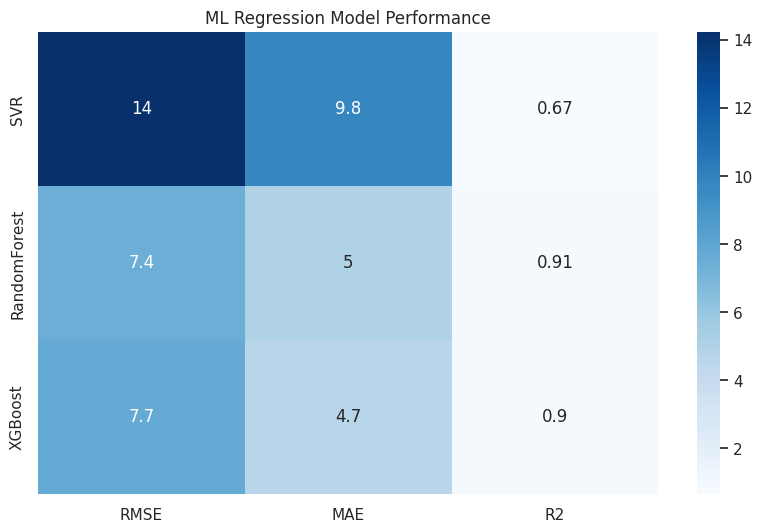

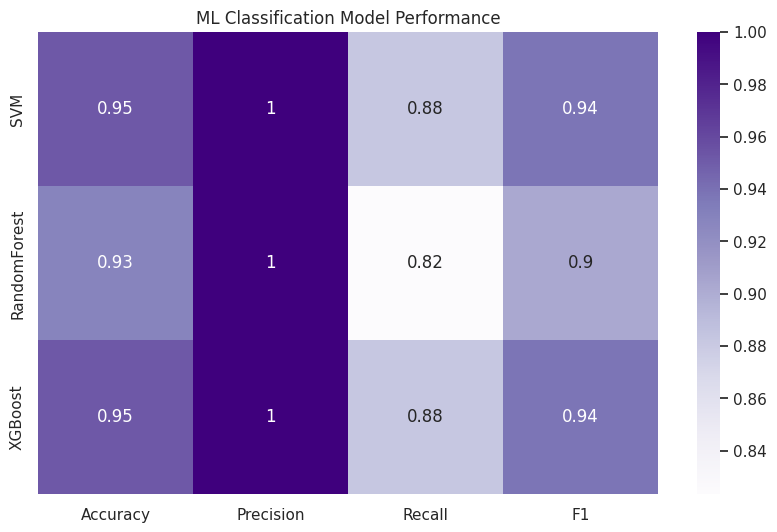

In [ ]:
print("🏁 FINAL SUMMARY")

summary = {
    'ANN Regression': ann_reg_results,
    'ANN Classification': ann_cls_results
}
summary_df = pd.concat([
    ml_reg_results.add_prefix('Reg_'),
    ml_cls_results.add_prefix('Cls_'),
    stacked_results.add_prefix('Stacked_'),
    pd.DataFrame(summary).T
], axis=0).fillna('-')

display(summary_df)

plt.figure(figsize=(10,6))
sns.heatmap(ml_reg_results, annot=True, cmap='Blues')
plt.title("ML Regression Model Performance")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(ml_cls_results, annot=True, cmap='Purples')
plt.title("ML Classification Model Performance")
plt.show()


**Final Model Comparision**

🏁 FINAL MODEL COMPARISON 🏁

📊 REGRESSION MODELS (Sorted by RMSE - Lower is Better):


,RMSE,MAE,R2
Residual CNN Regression,4.581432,3.481801,0.965778
ANN Regression,5.676929,4.456126,0.947455
MultiKernel CNN Regression,5.906168,4.315729,0.943126
GRU Regression,6.147940,4.430888,0.938374
Stacked_RandomForest,7.311879,4.590476,0.912832
RandomForest,7.437185,4.984524,0.909818
XGBoost,7.691028,4.692913,0.903557
Stacked_XGBoost,8.188460,4.906898,0.890678
Stacked_SVR,14.204934,9.675109,0.671012
SVR,14.232545,9.753321,0.669732



vn📊 CLASSIFICATION MODELS (Sorted by Accuracy - Higher is Better):


,Accuracy,Precision,Recall,F1
SVM,0.952381,1.0,0.882353,0.937500
XGBoost,0.952381,1.0,0.882353,0.937500
ANN Classification,0.952381,1.0,0.882353,0.937500
MultiKernel CNN Classification,0.952381,1.0,0.882353,0.937500
RandomForest,0.928571,1.0,0.823529,0.903226
GRU Classification,0.928571,1.0,0.823529,0.903226
Residual CNN Classification,0.928571,1.0,0.823529,0.903226


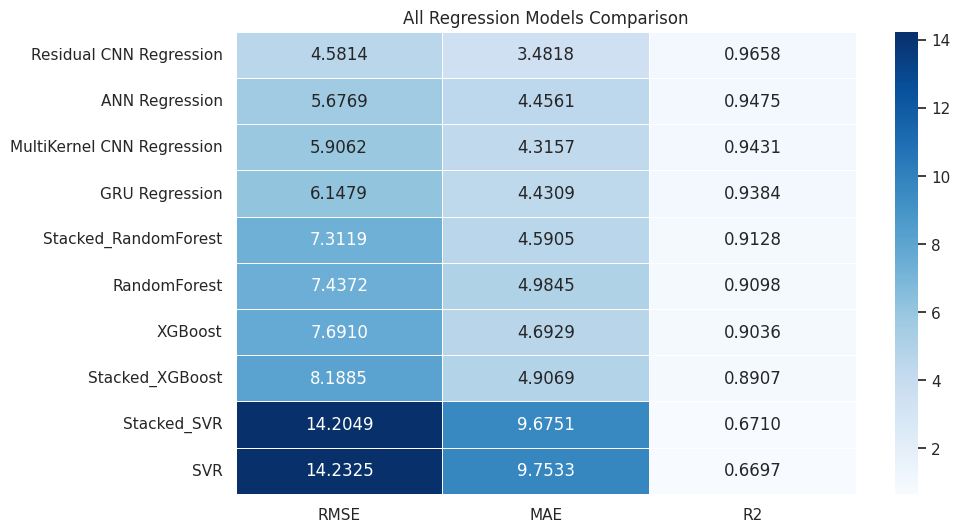

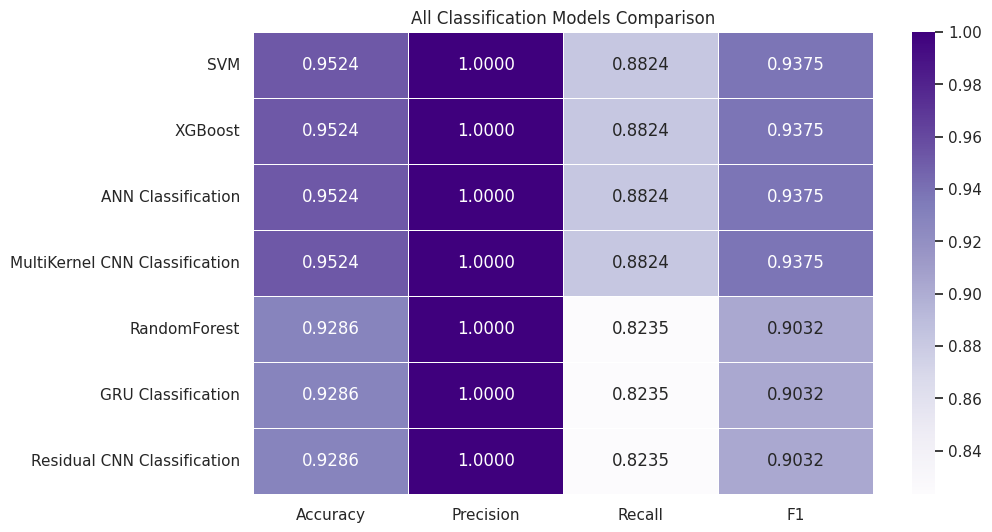

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("🏁 FINAL MODEL COMPARISON 🏁")
print("="*30)

# -----------------------------
# 1. Aggregate Regression Models
# -----------------------------
# List to hold all regression dataframes
reg_dfs = []

# Add Classical ML Results
if 'ml_reg_results' in locals():
    reg_dfs.append(ml_reg_results)

# Add Stacking Results (Renaming index to distinguish from standard ML)
if 'stacked_results' in locals():
    stacked_renamed = stacked_results.rename(index=lambda x: f"Stacked_{x}")
    reg_dfs.append(stacked_renamed)

# Add Deep Learning Results (Convert Dicts to DataFrames)
if 'ann_reg_results' in locals():
    reg_dfs.append(pd.DataFrame([ann_reg_results], index=['ANN Regression']))
if 'gru_reg_results' in locals():
    reg_dfs.append(pd.DataFrame([gru_reg_results], index=['GRU Regression']))
if 'mk_cnn_reg_results' in locals():
    reg_dfs.append(pd.DataFrame([mk_cnn_reg_results], index=['MultiKernel CNN Regression']))
if 'res_cnn_reg_results' in locals():
    reg_dfs.append(pd.DataFrame([res_cnn_reg_results], index=['Residual CNN Regression']))

# Concatenate all regression results
if reg_dfs:
    final_reg_df = pd.concat(reg_dfs).sort_values(by='RMSE', ascending=True) # Sort by best RMSE
    print("\n📊 REGRESSION MODELS (Sorted by RMSE - Lower is Better):")
    display(final_reg_df)
else:
    print("\nNo Regression models found.")

# -----------------------------
# 2. Aggregate Classification Models
# -----------------------------
# List to hold all classification dataframes
cls_dfs = []

# Add Classical ML Results
if 'ml_cls_results' in locals():
    cls_dfs.append(ml_cls_results)

# Add Deep Learning Results
if 'ann_cls_results' in locals():
    cls_dfs.append(pd.DataFrame([ann_cls_results], index=['ANN Classification']))
if 'gru_cls_results' in locals():
    cls_dfs.append(pd.DataFrame([gru_cls_results], index=['GRU Classification']))
if 'mk_cnn_clf_results' in locals():
    cls_dfs.append(pd.DataFrame([mk_cnn_clf_results], index=['MultiKernel CNN Classification']))
if 'res_cnn_clf_results' in locals():
    cls_dfs.append(pd.DataFrame([res_cnn_clf_results], index=['Residual CNN Classification']))

# Concatenate all classification results
if cls_dfs:
    final_cls_df = pd.concat(cls_dfs).sort_values(by='Accuracy', ascending=False) # Sort by best Accuracy
    print("\nvn📊 CLASSIFICATION MODELS (Sorted by Accuracy - Higher is Better):")
    display(final_cls_df)
else:
    print("\nNo Classification models found.")

# -----------------------------
# 3. Visualizations
# -----------------------------
if reg_dfs:
    plt.figure(figsize=(10, 6))
    sns.heatmap(final_reg_df, annot=True, cmap='Blues', fmt=".4f", linewidths=.5)
    plt.title("All Regression Models Comparison")
    plt.yticks(rotation=0)
    plt.show()

if cls_dfs:
    plt.figure(figsize=(10, 6))
    sns.heatmap(final_cls_df, annot=True, cmap='Purples', fmt=".4f", linewidths=.5)
    plt.title("All Classification Models Comparison")
    plt.yticks(rotation=0)
    plt.show()